In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns

In [3]:
# veriyi içe aktaralım
sutun_isimleri = ["hedef", "silindir", "motor_hacmi", "beygir_gucu", "agirlik", "ivme", "model_yil", "mensei"]
df = pd.read_csv("auto-mpg.data", names = sutun_isimleri, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)
print(df.head())

   hedef  silindir  motor_hacmi  beygir_gucu  agirlik  ivme  model_yil  mensei
0   18.0         8        307.0        130.0   3504.0  12.0         70       1
1   15.0         8        350.0        165.0   3693.0  11.5         70       1
2   18.0         8        318.0        150.0   3436.0  11.0         70       1
3   16.0         8        304.0        150.0   3433.0  12.0         70       1
4   17.0         8        302.0        140.0   3449.0  10.5         70       1


In [4]:
df.head

<bound method NDFrame.head of      hedef  silindir  motor_hacmi  beygir_gucu  agirlik  ivme  model_yil  \
0     18.0         8        307.0        130.0   3504.0  12.0         70   
1     15.0         8        350.0        165.0   3693.0  11.5         70   
2     18.0         8        318.0        150.0   3436.0  11.0         70   
3     16.0         8        304.0        150.0   3433.0  12.0         70   
4     17.0         8        302.0        140.0   3449.0  10.5         70   
..     ...       ...          ...          ...      ...   ...        ...   
393   27.0         4        140.0         86.0   2790.0  15.6         82   
394   44.0         4         97.0         52.0   2130.0  24.6         82   
395   32.0         4        135.0         84.0   2295.0  11.6         82   
396   28.0         4        120.0         79.0   2625.0  18.6         82   
397   31.0         4        119.0         82.0   2720.0  19.4         82   

     mensei  
0         1  
1         1  
2         1  
3

In [5]:
df=df.replace("?",np.nan)
df["beygir_gucu"]=df["beygir_gucu"].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hedef        398 non-null    float64
 1   silindir     398 non-null    int64  
 2   motor_hacmi  398 non-null    float64
 3   beygir_gucu  392 non-null    float64
 4   agirlik      398 non-null    float64
 5   ivme         398 non-null    float64
 6   model_yil    398 non-null    int64  
 7   mensei       398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
df.isnull().sum()

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    6
agirlik        0
ivme           0
model_yil      0
mensei         0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


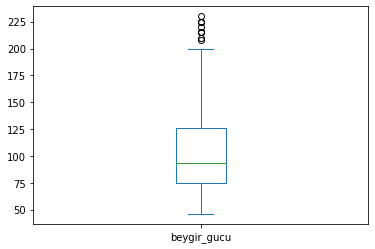

In [9]:
#Only beygir_gucu column has nan values.
#Checking 'beygir_gucu' for outliers.
print(df['beygir_gucu'].plot(kind='box'))

In [11]:
#Horsepower has too many outliers, thus for imputing the nan values, we will use the median values.
#After imputing, checking the nan counts.

df['beygir_gucu'].fillna(df['beygir_gucu'].median(), inplace = True)

df.beygir_gucu.isnull().sum()

0

In [12]:
#Getting an overview of the dataset
df.describe()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Our dataset has target variable mpg (miles per gallon) which is going to be predicted using the model. The feature variables are -

silindir	
motor_hacmi	
beygir_gucu	
agirlik	
ivme	
model_yil	
mensei

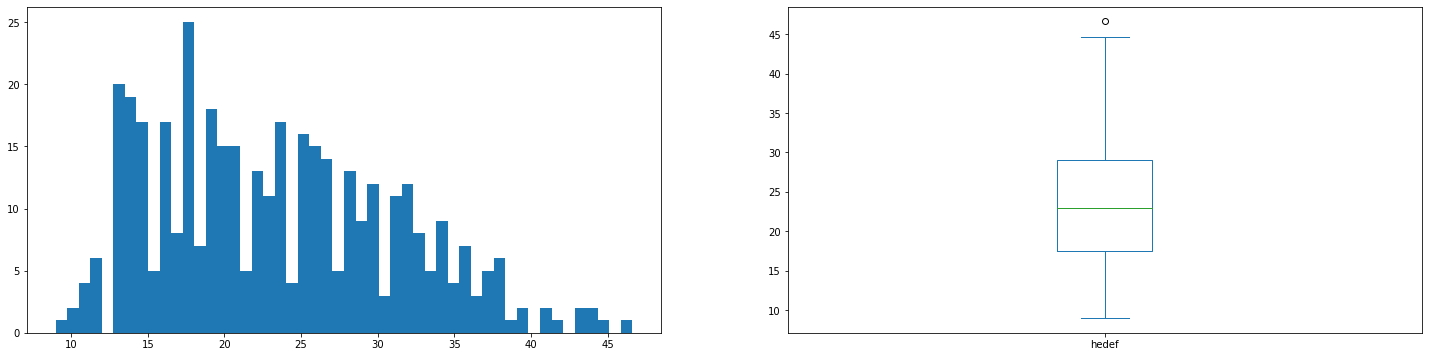

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: hedef, dtype: float64


In [14]:
#Plotting the target variable mpg (miles per gallon) first in histogram and then in boxplot


plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.hedef,50)

plt.subplot(1,2,2)
df['hedef'].plot(kind='box')

plt.show()

print(df['hedef'].describe())

The plot is rightly skewed

mode is somewhere around 17 which is away from mean and median

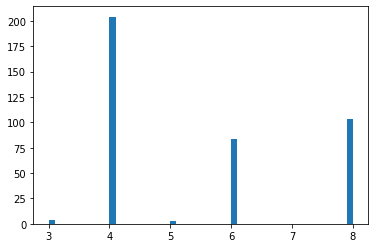

In [15]:
#Plotting another variable 'no.of cylinders' first in histogram and then in boxplot
plt.hist(df.silindir,50)
plt.show()


Cars in the sample have no. of cylinders in the range of [3,8]. 
Also we observe that there is no car which has 7 cylinders. 
This is a categorical data. We will analyze it later.

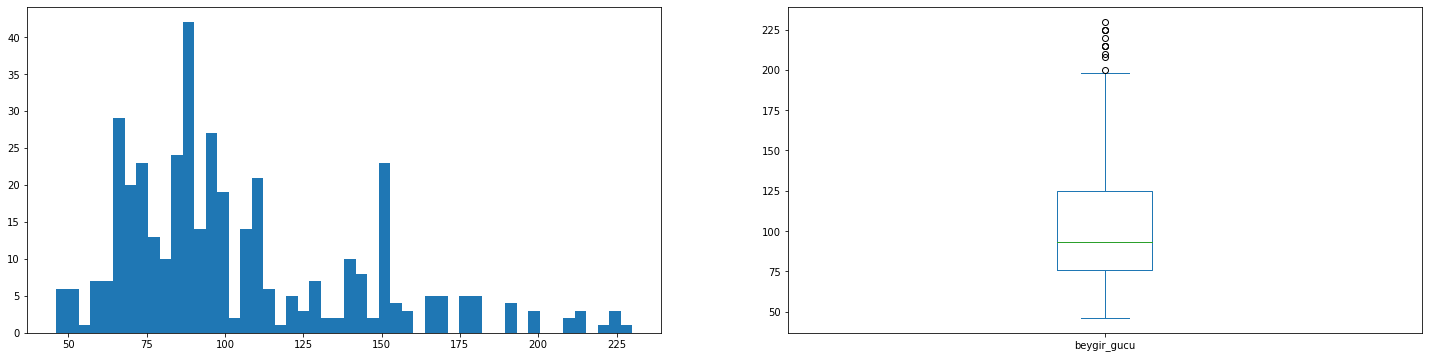

count    398.000000
mean     104.304020
std       38.222625
min       46.000000
25%       76.000000
50%       93.500000
75%      125.000000
max      230.000000
Name: beygir_gucu, dtype: float64


In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.hist(df.beygir_gucu,50)

plt.subplot(1,2,2)
df['beygir_gucu'].plot(kind='box')

plt.show()

print(df['beygir_gucu'].describe())

horsepower in the above dataset ranges from 50 to 230. the normal distribution here is right skewed. Some outliers are there in the higher side however data is mostly spread between 60 to 100.

Bivariate Analysis

we will now plot the car mileage(mpg) with each of the features and see which feature effects the data by what extent

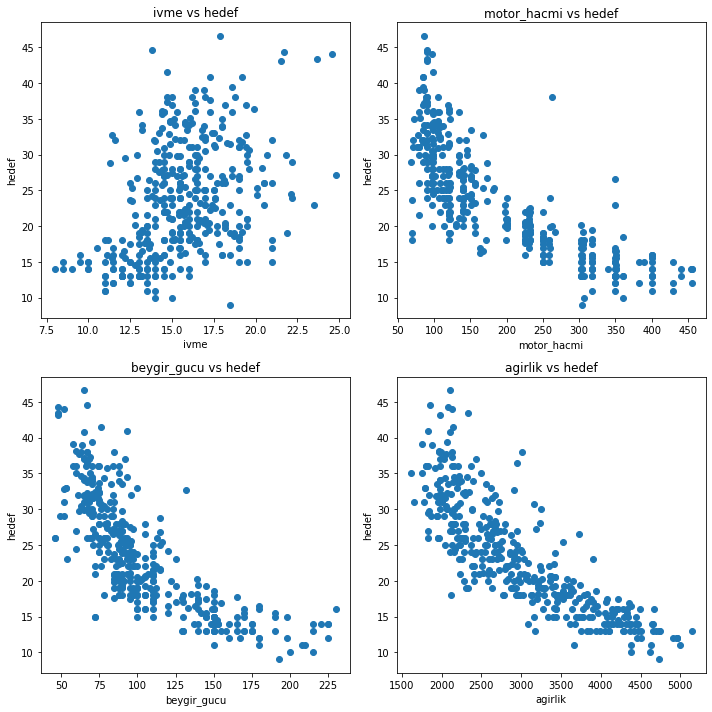

In [20]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(df[x],df['hedef'])
    plt.title(x+' vs hedef')
    plt.ylabel('hedef')
    plt.xlabel(x)

plt.figure(figsize=(10,10))

scatter('ivme', 1)
scatter('motor_hacmi', 2)
scatter('beygir_gucu', 3)
scatter('agirlik', 4)
plt.tight_layout()


motor_hacmi, beygir_gucu and agirlik seems to have a negative correlation with mpg.

ivme doesn't show any significant trend with price.

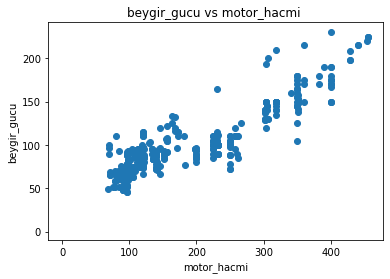

In [29]:
def scatter2(x,fig):
    plt.plot(2,2)
    plt.scatter(df[x],df['beygir_gucu'])
    plt.title("beygir_gucu vs motor_hacmi ")
    plt.ylabel('beygir_gucu')
    plt.xlabel(x)
    
scatter2("motor_hacmi",1)

motor_hacmi and beygir_gucu have positive correlation between them.

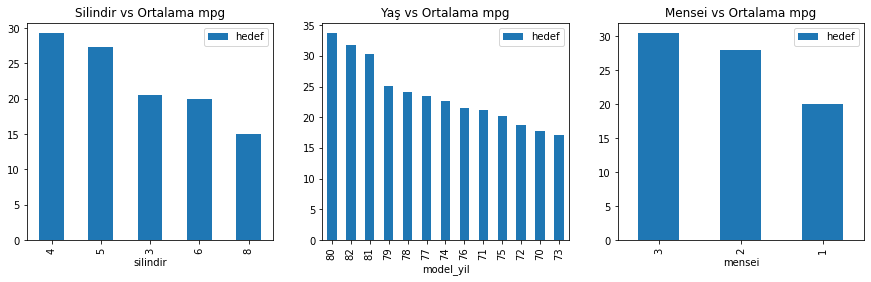

In [32]:
#plt.figure(figsize=(6.4,4.8))

figure, axes = plt.subplots(1, 3)

figure_size = (15,4)

df1 = pd.DataFrame(df.groupby(['silindir'])['hedef'].mean().sort_values(ascending = False))
#ax = plt.subplot(2,2,1)
df1.plot.bar(figsize=figure_size, ax = axes[0], title = 'Silindir vs Ortalama mpg')
#_ = plt.title('Cylinders vs Average mpg')

#plt.show()



df2 = pd.DataFrame(df.groupby(['model_yil'])['hedef'].mean().sort_values(ascending = False))
##plt.subplot(2,2,2)
df2.plot.bar(figsize=figure_size, ax = axes[1], title = 'Yaş vs Ortalama mpg' )


#plt.show()


df3 = pd.DataFrame(df.groupby(['mensei'])['hedef'].mean().sort_values(ascending = False))
#plt.subplot(2,2,3)
df3.plot.bar(figsize=figure_size, ax = axes[2], title = 'Mensei vs Ortalama mpg')
#_ = plt.title('Origin vs Average mpg')

#plt.show()

plt.show()

Inferences

Cars with 4 cylinders have maximum frequency as well as performance in terms of mpg is also good.
Cars with 8 cylinders do not give better mileage.
Model year does not have a significant effect in mileage as there are cars in the sample which are distributed among different model years widely and the mileage they provide cover a large range of mpg
cars with origin 1 are more abundant whereas cars with origin 3 provide better mileage.

List of significant variables after visual analysis


Beygir Gucu -
Ağırlık -
Silindir Sayısı

In [34]:
df_new = df[['hedef' , 'beygir_gucu' , 'agirlik' , 'silindir']]
df_new.head()

,hedef,beygir_gucu,agirlik,silindir
0,18.0,130.0,3504.0,8
1,15.0,165.0,3693.0,8
2,18.0,150.0,3436.0,8
3,16.0,150.0,3433.0,8
4,17.0,140.0,3449.0,8


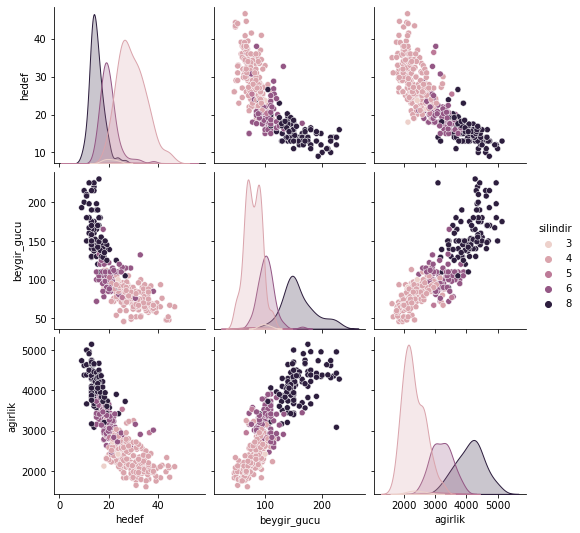

In [35]:
sns.pairplot(df_new, hue = 'silindir')
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X =  pd.DataFrame(sc_x.fit_transform(df_new.drop(["hedef"],axis = 1)),columns=['beygir_gucu', 'agirlik', 'silindir'])
y = df_new.hedef
x.head()


,beygir_gucu,agirlik,silindir
0,0.673118,0.630870,1.498191
1,1.589958,0.854333,1.498191
2,1.197027,0.550470,1.498191
3,1.197027,0.546923,1.498191
4,0.935072,0.565841,1.498191


In [76]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.2)

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 73.19215812524%
Mean absolute error: 2.9969822194750213
Mean squared error: 16.48983863518831
R Squared: 0.7319215812524
Adjusted R Squared: 0.7249585054407741
